# Feature Engineering with PySpark

## Exploratory Data Analysis

In [1]:
import pyspark as sp

In [5]:
sp.version

<module 'pyspark.version' from '/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/pyspark/version.py'>

In [6]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)


In [27]:
sys.version

'3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [8]:
import os
os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/jdk1.8.0_151.jdk/Contents/Home"

In [9]:
sc = sp.SparkContext.getOrCreate()

In [10]:
sc.version

'2.4.0'

In [13]:
# spark session
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession 

# Create a session as spark 
spark = SparkSession.builder.getOrCreate()

In [119]:
df = spark.read.csv('2017_StPaul_MN_Real_Estate.csv', header=True)
df.columns

['No.',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PoolDescription',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'UNITNUMBER',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'backonmarketdate',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6'

In [120]:
df.count()

5000

In [121]:
df.dtypes

[('No.', 'string'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'string'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'string'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'string'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'string'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'string'),
 ('PricePerTSFT', 'string'),
 ('FOUNDATIONSIZE', 'string'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'string'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'string'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PoolDescription', 'string'),
 ('PDOM', 'string'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'string'),
 ('Taxes', 'string'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'string'),
 ('TAXYEAR', 's

### What are we predicting?

In [122]:
# Select our dependent variable
Y_df = df.select(['SalesClosePrice'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|            100000|
|    max|             99900|
+-------+------------------+



Looks like we need to convert the data type of SalesClosePrice:

In [123]:
# convert the data type of SalesClosePrice to integer
df = df.withColumn("SalesClosePrice", df.SalesClosePrice.cast("integer"))

In [124]:
df.select('SalesClosePrice').describe().show()

+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



In [125]:
df = df.withColumn("AssessedValuation", df.AssessedValuation.cast("double"))
df = df.withColumn("AssociationFee", df.AssociationFee.cast("bigint"))
df = df.withColumn("SQFTBELOWGROUND", df.SQFTBELOWGROUND.cast("bigint"))

In [126]:
required_dtypes = [('NO', 'bigint'),
 ('MLSID', 'string'),
 ('STREETNUMBERNUMERIC', 'bigint'),
 ('STREETADDRESS', 'string'),
 ('STREETNAME', 'string'),
 ('POSTALCODE', 'bigint'),
 ('STATEORPROVINCE', 'string'),
 ('CITY', 'string'),
 ('SALESCLOSEPRICE', 'bigint'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'bigint'),
 ('LISTTYPE', 'string'),
 ('ORIGINALLISTPRICE', 'bigint'),
 ('PRICEPERTSFT', 'double'),
 ('FOUNDATIONSIZE', 'bigint'),
 ('FENCE', 'string'),
 ('MAPLETTER', 'string'),
 ('LOTSIZEDIMENSIONS', 'string'),
 ('SCHOOLDISTRICTNUMBER', 'string'),
 ('DAYSONMARKET', 'bigint'),
 ('OFFMARKETDATE', 'string'),
 ('FIREPLACES', 'bigint'),
 ('ROOMAREA4', 'string'),
 ('ROOMTYPE', 'string'),
 ('ROOF', 'string'),
 ('ROOMFLOOR4', 'string'),
 ('POTENTIALSHORTSALE', 'string'),
 ('POOLDESCRIPTION', 'string'),
 ('PDOM', 'bigint'),
 ('GARAGEDESCRIPTION', 'string'),
 ('SQFTABOVEGROUND', 'bigint'),
 ('TAXES', 'bigint'),
 ('ROOMFLOOR1', 'string'),
 ('ROOMAREA1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'bigint'),
 ('LIVINGAREA', 'bigint'),
 ('UNITNUMBER', 'string'),
 ('YEARBUILT', 'bigint'),
 ('ZONING', 'string'),
 ('STYLE', 'string'),
 ('ACRES', 'double'),
 ('COOLINGDESCRIPTION', 'string'),
 ('APPLIANCES', 'string'),
 ('BACKONMARKETDATE', 'double'),
 ('ROOMFAMILYCHAR', 'string'),
 ('ROOMAREA3', 'string'),
 ('EXTERIOR', 'string'),
 ('ROOMFLOOR3', 'string'),
 ('ROOMFLOOR2', 'string'),
 ('ROOMAREA2', 'string'),
 ('DININGROOMDESCRIPTION', 'string'),
 ('BASEMENT', 'string'),
 ('BATHSFULL', 'bigint'),
 ('BATHSHALF', 'bigint'),
 ('BATHQUARTER', 'bigint'),
 ('BATHSTHREEQUARTER', 'double'),
 ('CLASS', 'string'),
 ('BATHSTOTAL', 'bigint'),
 ('BATHDESC', 'string'),
 ('ROOMAREA5', 'string'),
 ('ROOMFLOOR5', 'string'),
 ('ROOMAREA6', 'string'),
 ('ROOMFLOOR6', 'string'),
 ('ROOMAREA7', 'string'),
 ('ROOMFLOOR7', 'string'),
 ('ROOMAREA8', 'string'),
 ('ROOMFLOOR8', 'string'),
 ('BEDROOMS', 'bigint'),
 ('SQFTBELOWGROUND', 'bigint'),
 ('ASSUMABLEMORTGAGE', 'string'),
 ('ASSOCIATIONFEE', 'bigint'),
 ('ASSESSMENTPENDING', 'string'),
 ('ASSESSEDVALUATION', 'double')]

In [128]:
old_columns = df.columns

In [130]:
new_columns = [c for c, d in required_dtypes]

In [132]:
for n, o in zip(new_columns, old_columns): 
    df = df.withColumnRenamed(o, n)

### Verifying Data Load

In [134]:
def check_load(df, num_records, num_columns):
    # Takes a dataframe and compares record and column counts to input
    # Message to return if the critera below aren't met
    message = 'Validation Failed'
    # Check number of records
    if num_records == df.count():
        # Check number of columns
        if num_columns == len(df.columns):
          # Success message
          message = 'Validation Passed'
    return message

# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


### Verifying DataTypes

In [137]:
validation_dict = {'ASSESSMENTPENDING': 'string',
 'ASSESSEDVALUATION': 'double',
 'ASSOCIATIONFEE': 'bigint',
 'ASSUMABLEMORTGAGE': 'string',
 'SQFTBELOWGROUND': 'bigint'}

In [138]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes

# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict:

        # Compare attribute types
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

SQFTBELOWGROUND has expected dtype.
ASSUMABLEMORTGAGE has expected dtype.
ASSOCIATIONFEE has expected dtype.
ASSESSMENTPENDING has expected dtype.
ASSESSEDVALUATION has expected dtype.


### Using `Corr()`

In [139]:
for required_type, current_column in zip(required_dtypes, df.columns):
    # since the required and current column names are the exact order we can do:
    if req[1] != 'string':
#         df = df.withColumn("{:}".format(current_column), df["`{:}`".format(current_column)].cast(req[1]))
        df = df.withColumn("{:}".format(current_column), df["{:}".format(current_column)].cast(req[1]))

In [140]:
check_columns = ['FOUNDATIONSIZE',
 'DAYSONMARKET',
 'FIREPLACES',
 'PDOM',
 'SQFTABOVEGROUND',
 'TAXES',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LIVINGAREA',
 'YEARBUILT',
 'ACRES',
 'BACKONMARKETDATE',
 'BATHSFULL',
 'BATHSHALF',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'BATHSTOTAL',
 'BEDROOMS',
 'SQFTBELOWGROUND',
 'ASSOCIATIONFEE',
 'ASSESSEDVALUATION']

In [141]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = check_columns[0]

# Loop to check all columns contained in list
for col in check_columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col, 'SALESCLOSEPRICE')
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


### Using Visualizations: distplot

In [142]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

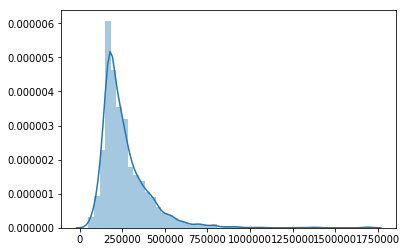

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [143]:
# Select a single column and sample and convert to pandas
# sample 50% and not use replacement and setting the random seed to 42.
sample_df = df.select(['LISTPRICE']).sample(False, .5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show()

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

We can use the skewness function to verify this numerically rather than visually.

### Using Visualizations: lmplot

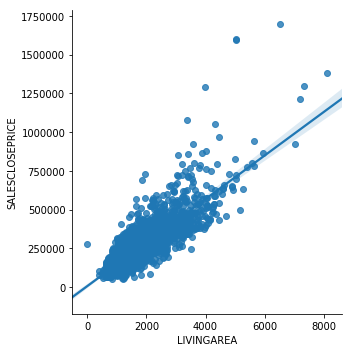

In [144]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE','LIVINGAREA']).sample(False, .5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)

we can see that as LivingArea increases, the price of the home increases at a relatively steady rate

## Wrangling with Spark Functions

### Dropping a list of columns

In [ ]:
# List of columns to remove from dataset
cols_to_drop = ['STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']

# Drop columns in list
df = df.drop(*cols_to_drop)

We can always come back to these after our intial model if we need more information.

### Using text filters to remove records

In [146]:
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

# List of possible values containing 'yes'
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']

# Filter the text values out of df but keep null values
text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)

# Print count of remaining records
print(df.count())

+-----------------+
|ASSUMABLEMORTGAGE|
+-----------------+
|             null|
+-----------------+

5000


### Filtering numeric fields conditionally

In [152]:
from pyspark.sql.functions import log

df = df.withColumn('log_SalesClosePrice', log('SalesClosePrice'))

In [153]:
from pyspark.sql.functions import mean, stddev

# Calculate values used for outlier filtering
mean_val = df.agg({'log_SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'log_SalesClosePrice': 'stddev'}).collect()[0][0]

# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

# Filter the data to fit between the lower and upper bounds
df = df.where((df['log_SalesClosePrice'] < hi_bound) & (df['log_SalesClosePrice'] > low_bound))

### Custom Percentage Scaling

In [155]:
from pyspark.sql.functions import round

In [156]:
# Define max and min values and collect them
max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]

# Create a new column based off the scaled data
df = df.withColumn('percentage_scaled_days', 
                  round((df['DAYSONMARKET'] - min_days) / (max_days - min_days)) * 100)

# Calc max and min for new column
print(df.agg({'percentage_scaled_days': 'max'}).collect())
print(df.agg({'percentage_scaled_days': 'min'}).collect())

[Row(max(percentage_scaled_days)=100.0)]
[Row(min(percentage_scaled_days)=0.0)]


### Scaling your scalers

In [157]:
def min_max_scaler(df, cols_to_scale):
    # Takes a dataframe and list of columns to minmax scale. Returns a dataframe.
    for col in cols_to_scale:
        # Define min and max values and collect them
        max_days = df.agg({col: 'max'}).collect()[0][0]
        min_days = df.agg({col: 'min'}).collect()[0][0]
        new_column_name = 'scaled_' + col
        # Create a new column based off the scaled data
        df = df.withColumn(new_column_name, 
                          (df[col] - min_days) / (max_days - min_days))
    return df
  
df = min_max_scaler(df, ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES'])
# Show that our data is now between 0 and 1
df[['DAYSONMARKET', 'scaled_DAYSONMARKET']].show()

+------------+--------------------+
|DAYSONMARKET| scaled_DAYSONMARKET|
+------------+--------------------+
|          10|0.044444444444444446|
|           4|0.017777777777777778|
|          28| 0.12444444444444444|
|          19| 0.08444444444444445|
|          21| 0.09333333333333334|
|          17| 0.07555555555555556|
|          32| 0.14222222222222222|
|           5|0.022222222222222223|
|          23| 0.10222222222222223|
|          73|  0.3244444444444444|
|          80| 0.35555555555555557|
|          79|  0.3511111111111111|
|          12| 0.05333333333333334|
|           1|0.004444444444444...|
|          18|                0.08|
|           2|0.008888888888888889|
|          12| 0.05333333333333334|
|          45|                 0.2|
|          31| 0.13777777777777778|
|          16| 0.07111111111111111|
+------------+--------------------+
only showing top 20 rows



### Correcting Right Skew Data

In [158]:
# Compute the skewness
print(df.agg({'YEARBUILT': 'skewness'}).collect())

# Calculate the max year
max_year = df.agg({'YEARBUILT': 'max'}).collect()[0][0]

# Create a new column of reflected data
df = df.withColumn('Reflect_YearBuilt', (max_year + 1) - df['YEARBUILT'])

# Create a new column based reflected data
df = df.withColumn('adj_yearbuilt', 1 / log(df['Reflect_YearBuilt']))

[Row(skewness(YEARBUILT)=-0.24797344910486546)]
